In [1]:
import sys
sys.path.append("/storage/vbutoi/projects/")
sys.path.append("/storage/vbutoi/libraries/")
from ionpy.analysis import ResultsLoader
import seaborn as sns
import pandas as pd

sns.set_style("darkgrid")

import os 
os.environ['DATAPATH'] = ':'.join((
       '/storage',
))

# Results loader object does everything
rs = ResultsLoader()
root = "/storage/vbutoi/scratch/ESE"

In [2]:
path = f"{root}/WMH_Runs"

dfc = rs.load_configs(
    path,
    properties=False,
)

  0%|          | 0/26 [00:00<?, ?it/s]

In [3]:
dfc.head()

,data,annotator,axis,dataset,slice_batch_size,slicing,task,batch_size,num_workers,pin_memory,...,model,convs_per_block,filters,in_channels,out_channels,optim,lr,epochs,eval_freq,path
0,ese.experiment.datasets.WMH,observer_o12,0,WMH,1,dense,Amsterdam,4,0,False,...,ese.experiment.models.UNet,2,"(32, 32, 32, 32)",1,1,torch.optim.Adam,0.0003,100,10,/storage/vbutoi/scratch/ESE/WMH_Runs/20230817_...
1,ese.experiment.datasets.WMH,observer_o12,0,WMH,1,dense,Amsterdam,8,0,False,...,ese.experiment.models.UNet,2,"(64, 64, 64, 64)",1,1,torch.optim.Adam,0.0003,100,10,/storage/vbutoi/scratch/ESE/WMH_Runs/20230817_...
2,ese.experiment.datasets.WMH,observer_o12,0,WMH,4,dense,Amsterdam,4,0,False,...,ese.experiment.models.UNet,2,"(32, 32, 32, 32)",1,1,torch.optim.Adam,0.0003,100,10,/storage/vbutoi/scratch/ESE/WMH_Runs/20230817_...
3,ese.experiment.datasets.WMH,observer_o12,0,WMH,1,dense,Amsterdam,4,0,False,...,ese.experiment.models.UNet,2,"(64, 64, 64, 64)",1,1,torch.optim.Adam,0.0003,100,10,/storage/vbutoi/scratch/ESE/WMH_Runs/20230817_...
4,ese.experiment.datasets.WMH,observer_o12,0,WMH,4,dense,Amsterdam,1,0,False,...,ese.experiment.models.UNet,2,"(64, 64, 64, 64)",1,1,torch.optim.Adam,0.0003,100,10,/storage/vbutoi/scratch/ESE/WMH_Runs/20230817_...


In [4]:
dfc.unique_per_col()

,1,4,8,16
slice_batch_size,8,8,8,2


,1,4,8,16
batch_size,8,6,6,6


,"(32, 32, 32, 32)","(64, 64, 64, 64)"
filters,13,13


In [5]:
df = rs.load_metrics(dfc)

  0%|          | 0/26 [00:00<?, ?it/s]

In [6]:
df.head()

,phase,epoch,loss,dice_score,data,annotator,axis,dataset,slice_batch_size,slicing,...,model,convs_per_block,filters,in_channels,out_channels,optim,lr,epochs,eval_freq,path
0,train,0,0.982315,0.010518,ese.experiment.datasets.WMH,observer_o12,0,WMH,1,dense,...,ese.experiment.models.UNet,2,"(32, 32, 32, 32)",1,1,torch.optim.Adam,0.0003,100,10,/storage/vbutoi/scratch/ESE/WMH_Runs/20230817_...
1,val,0,0.983281,0.025315,ese.experiment.datasets.WMH,observer_o12,0,WMH,1,dense,...,ese.experiment.models.UNet,2,"(32, 32, 32, 32)",1,1,torch.optim.Adam,0.0003,100,10,/storage/vbutoi/scratch/ESE/WMH_Runs/20230817_...
2,train,1,0.982179,0.036259,ese.experiment.datasets.WMH,observer_o12,0,WMH,1,dense,...,ese.experiment.models.UNet,2,"(32, 32, 32, 32)",1,1,torch.optim.Adam,0.0003,100,10,/storage/vbutoi/scratch/ESE/WMH_Runs/20230817_...
3,train,2,0.942605,0.093928,ese.experiment.datasets.WMH,observer_o12,0,WMH,1,dense,...,ese.experiment.models.UNet,2,"(32, 32, 32, 32)",1,1,torch.optim.Adam,0.0003,100,10,/storage/vbutoi/scratch/ESE/WMH_Runs/20230817_...
4,train,3,0.828075,0.079455,ese.experiment.datasets.WMH,observer_o12,0,WMH,1,dense,...,ese.experiment.models.UNet,2,"(32, 32, 32, 32)",1,1,torch.optim.Adam,0.0003,100,10,/storage/vbutoi/scratch/ESE/WMH_Runs/20230817_...


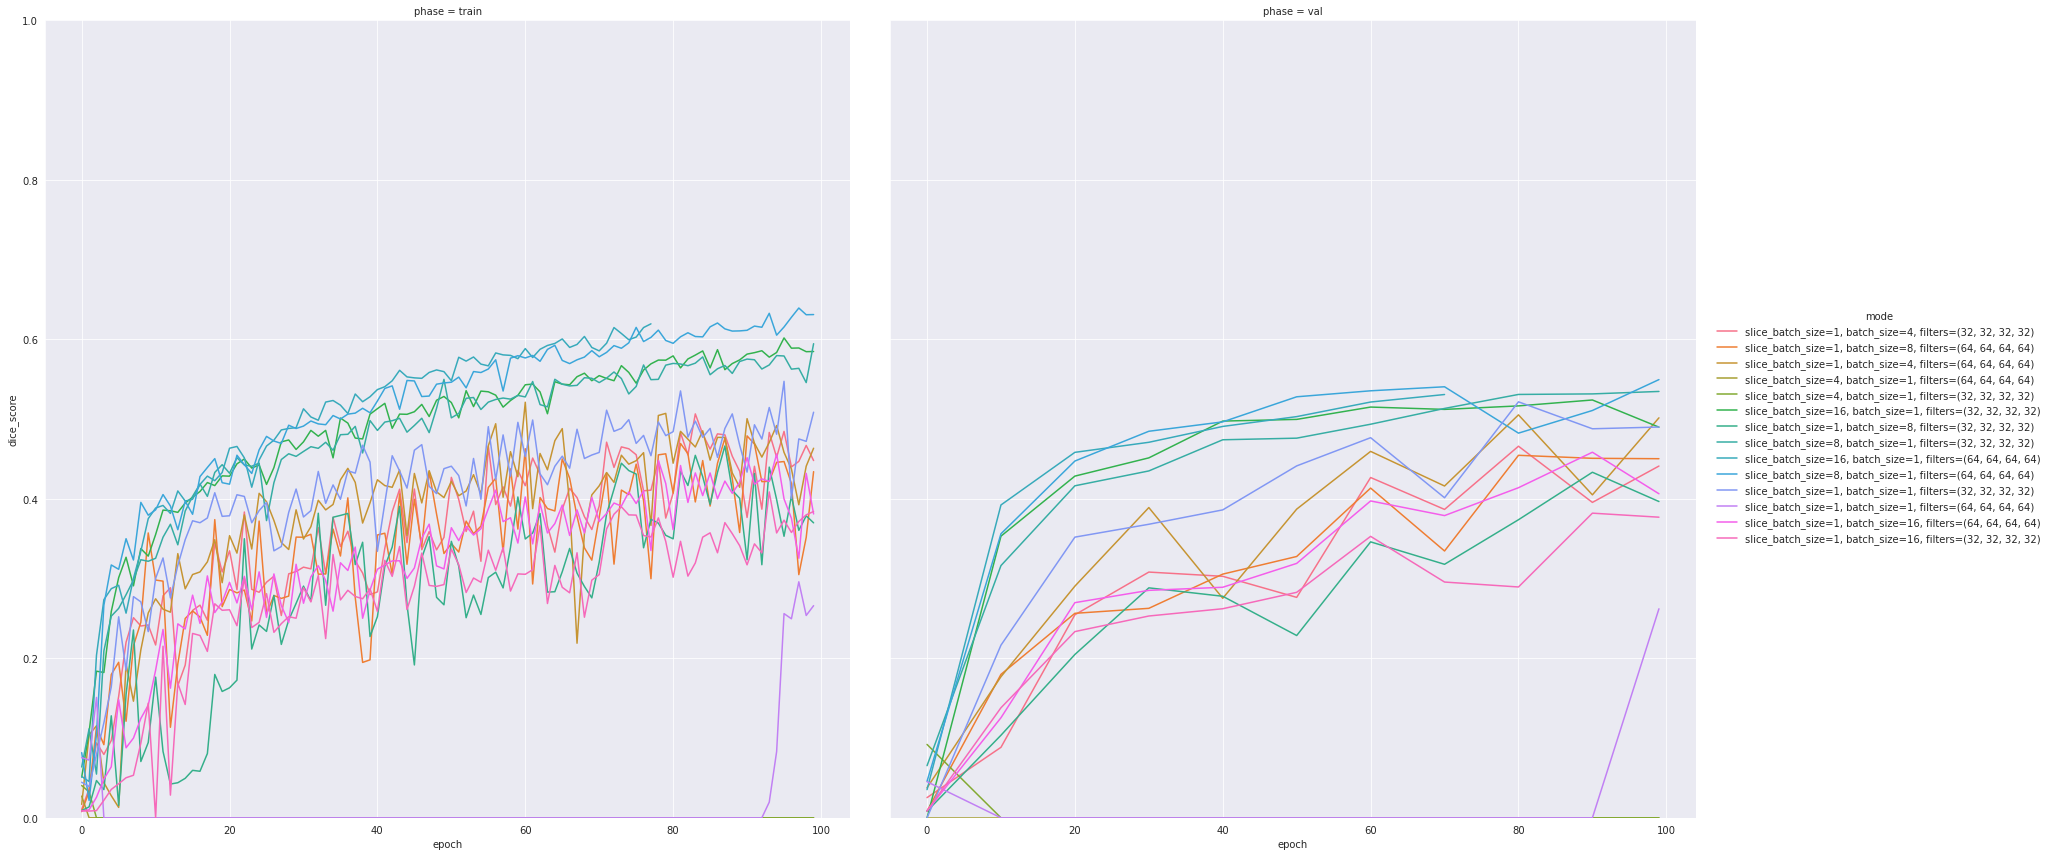

In [7]:
def mode(slice_batch_size, batch_size, filters):
    return f"slice_batch_size={slice_batch_size}, batch_size={batch_size}, filters={filters}"
df.augment(mode)

g = sns.relplot(
    data=df,
    x='epoch',
    y='dice_score',
    col='phase',
    hue='mode',
    kind='line',
    height=12,
    )

# Set column spacing
g.fig.subplots_adjust(wspace=0.05)
g.set(ylim=(0, 1))

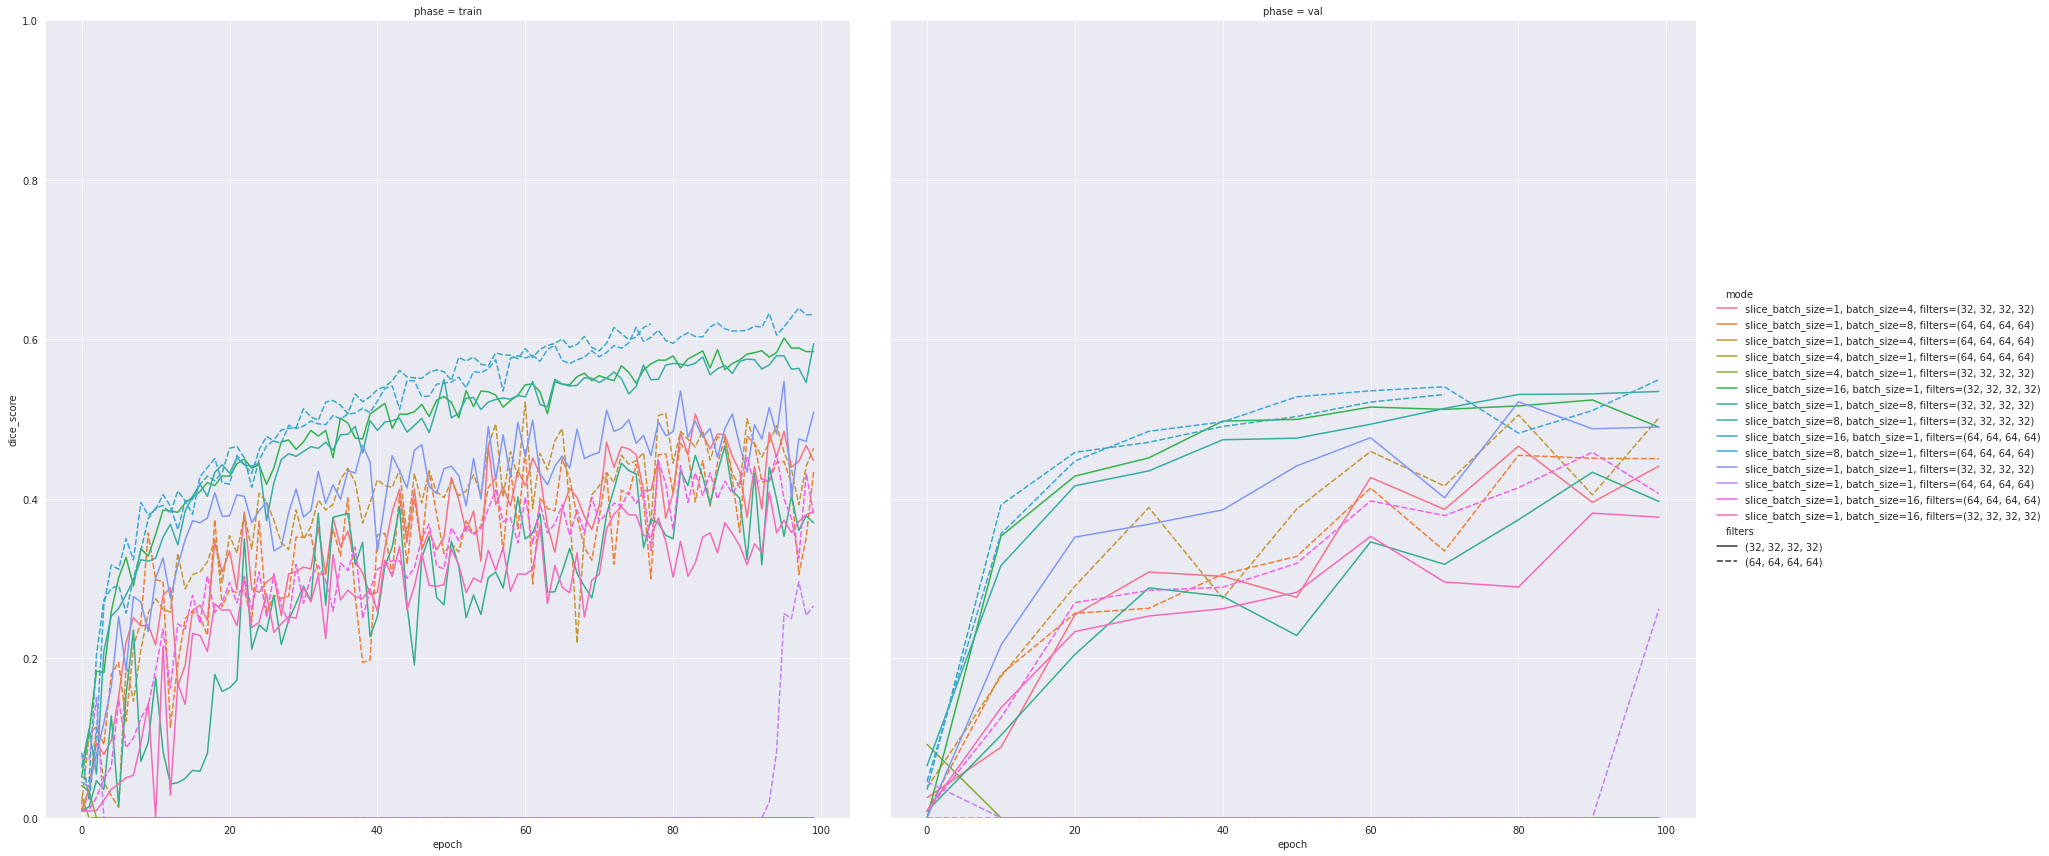

In [8]:
g = sns.relplot(
    data=df,
    x='epoch',
    y='dice_score',
    col='phase',
    hue='mode',
    kind='line',
    style='filters',
    height=12,
    )

# Set column spacing
g.fig.subplots_adjust(wspace=0.05)
g.set(ylim=(0, 1))

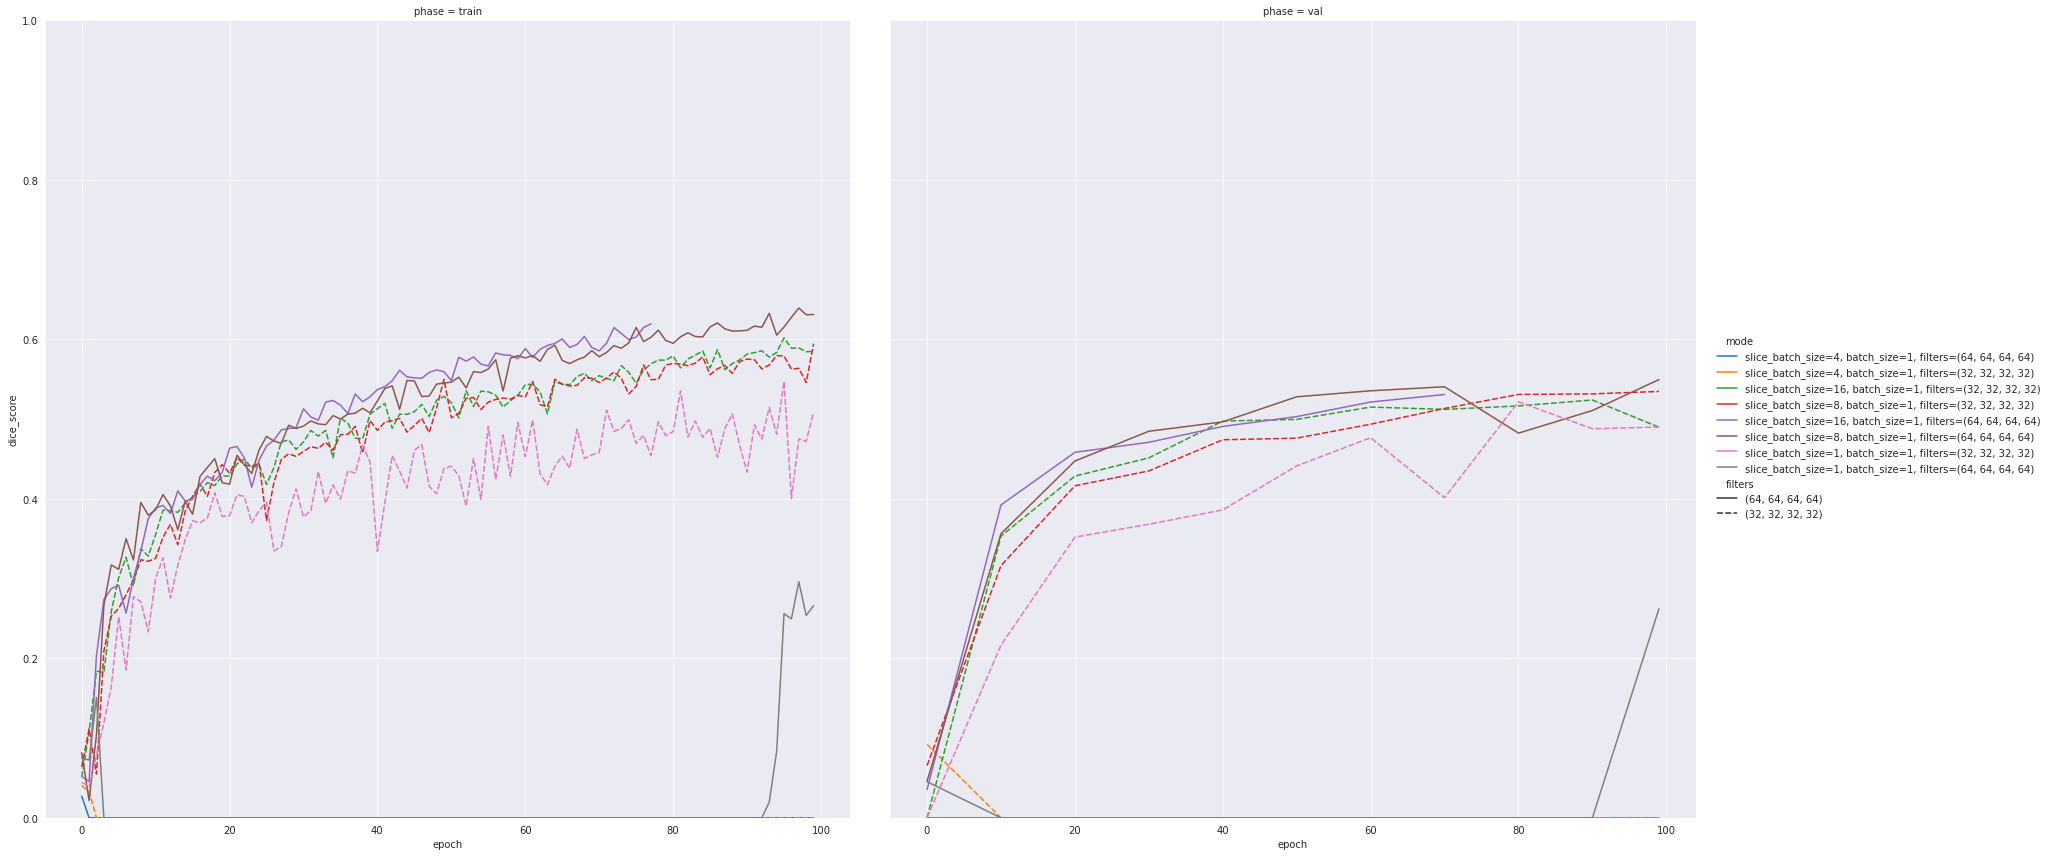

In [9]:
g = sns.relplot(
    data=df.select(batch_size=1),
    x='epoch',
    y='dice_score',
    col='phase',
    hue='mode',
    kind='line',
    style='filters',
    height=12,
    )

# Set column spacing
g.fig.subplots_adjust(wspace=0.05)
g.set(ylim=(0, 1))

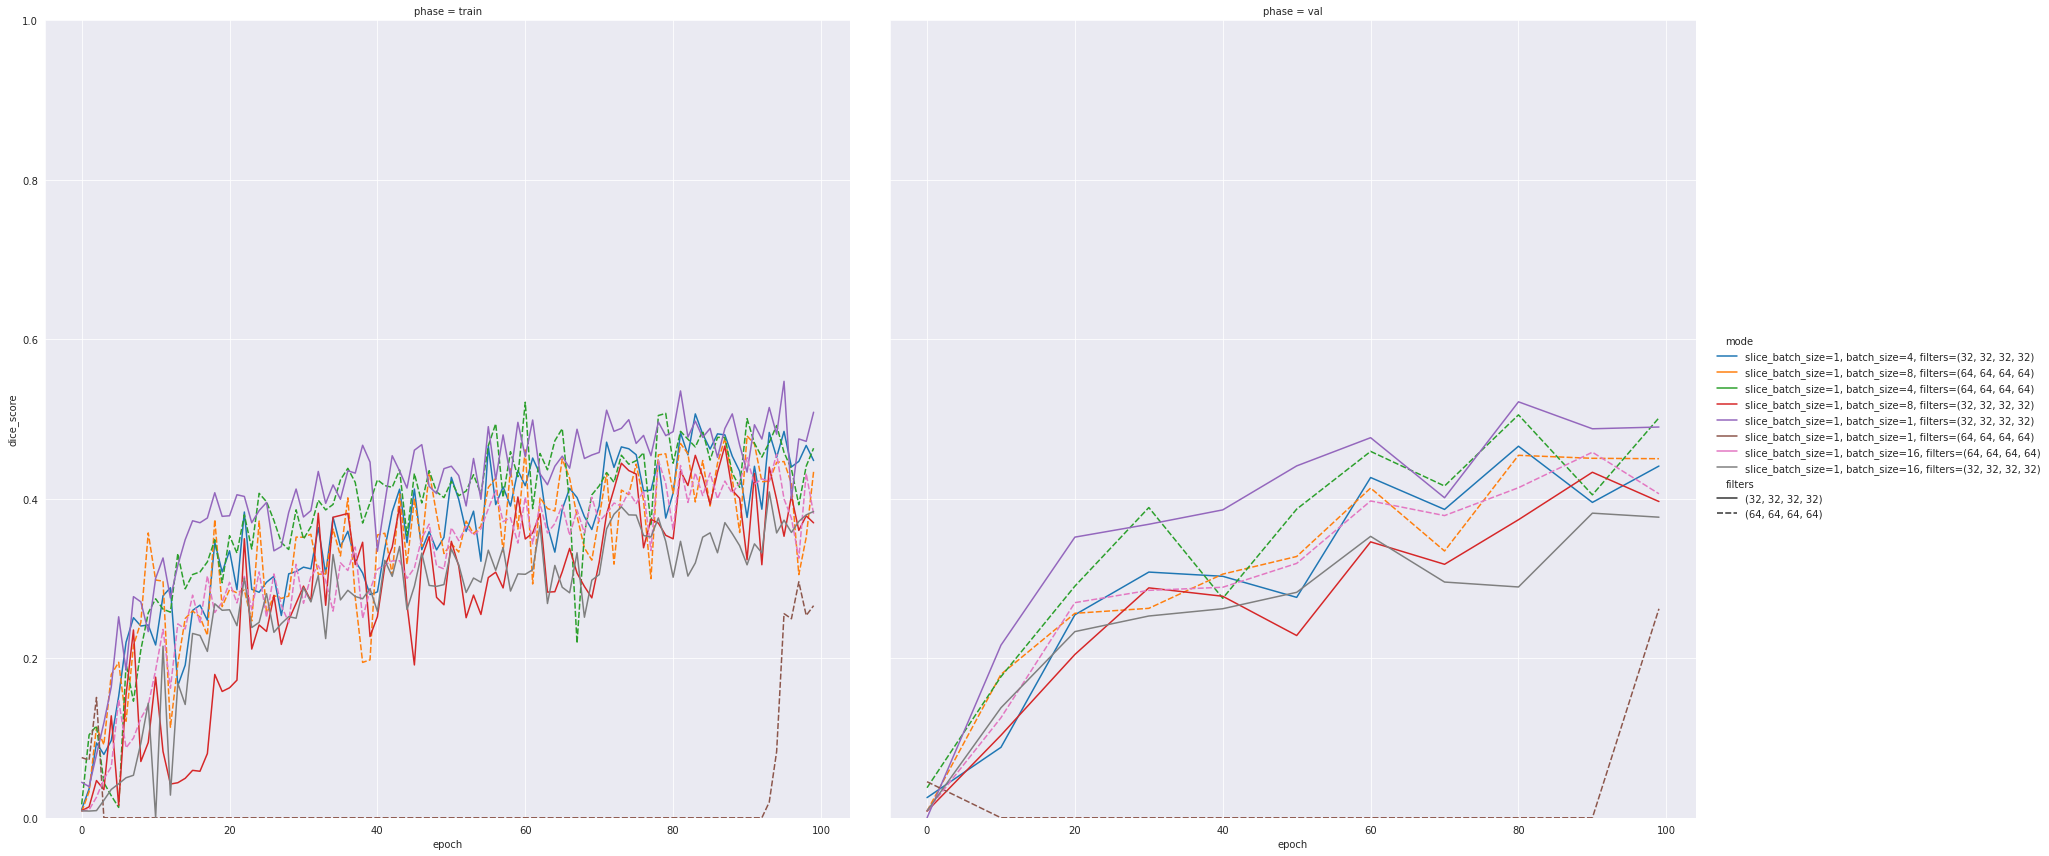

In [10]:
g = sns.relplot(
    data=df.select(slice_batch_size=1),
    x='epoch',
    y='dice_score',
    col='phase',
    hue='mode',
    kind='line',
    style='filters',
    height=12,
    )

# Set column spacing
g.fig.subplots_adjust(wspace=0.05)
g.set(ylim=(0, 1))